In [1]:
#Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import cv2,random,pickle
plt.rcParams["axes.grid"] = False
import tensorflow as tf
import keras
from keras.models import Model, Sequential,load_model
import h5py

In [6]:
#Importing functions from custom modules

from data import get_data_raw,get_data_resized 
from get_model import get_models
from get_display import get_matching
from get_cluster_number import get_number_of_clusters
from get_visualize_clusters import visual_cluster

In [7]:
master_list=get_data_raw() #master list is the list of the images in the given (512,512,3) shape

In [8]:
img_resized=get_data_resized(master_list) #resized the images into (160,160,3) 

In [9]:
#save_it(img_resized)   #enable this after this so as to save the resized image list, which can then be loaded quickly in further runs

In [10]:
'''with open('img_resized.pkl','rb') as f: #option to load the resized images directly
    img_resized = pickle.load(f)'''

"with open('img_resized.pkl','rb') as f:\n    img_resized = pickle.load(f)"

In [11]:
autoencoder,encoder=get_models()  # We will get the model 

In [ ]:
autoencoder.summary() #architechture of the model

In [13]:
pretrain_epochs = 60
batch_size = 16
#autoencoder.fit(img_resized, img_resized, batch_size=batch_size, epochs=pretrain_epochs,verbose=1)
#We have already trained

297/297 [==============================] - 204s 686ms/step - loss: 0.6418 - accuracy: 0.6769


In [23]:
#autoencoder.load_weights('conv_ae_weights_final_deployv7_img_160 .h5') #after training this model for 60 epochs we get these waits

In [24]:
encoder_output=encoder.predict(img_resized)  # this will provide us with encoded code

In [25]:
'''with open('encoder_output.pkl', 'wb') as f:
    pickle.dump(encoder_output, f)'''

"with open('encoder_output.pkl', 'wb') as f:\n    pickle.dump(encoder_output, f)"

In [26]:
'''with open('encoder_output.pkl','rb') as f:
    encoder_output = pickle.load(f)'''

"with open('encoder_output.pkl','rb') as f:\n    encoder_output = pickle.load(f)"

Input an image id which you want to find similar images of
Note image id are from 0 to 4737
Enter -1 to quit


 99


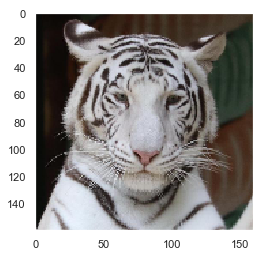

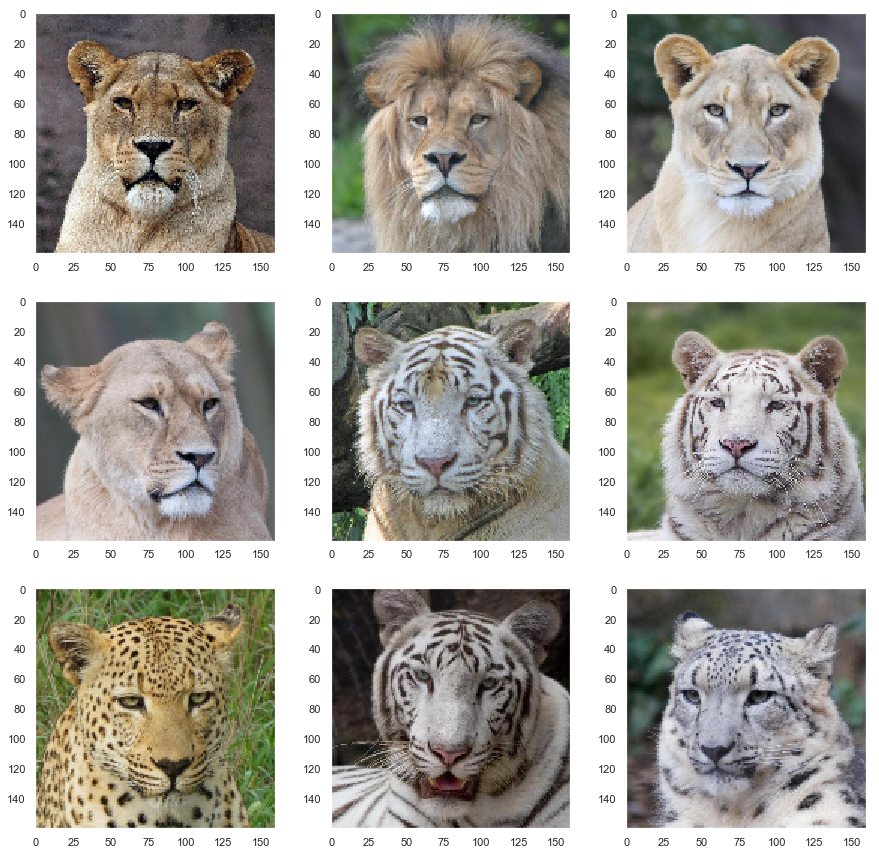

 5


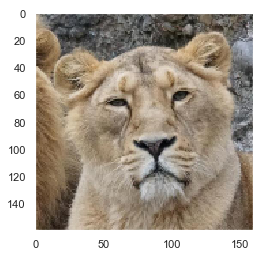

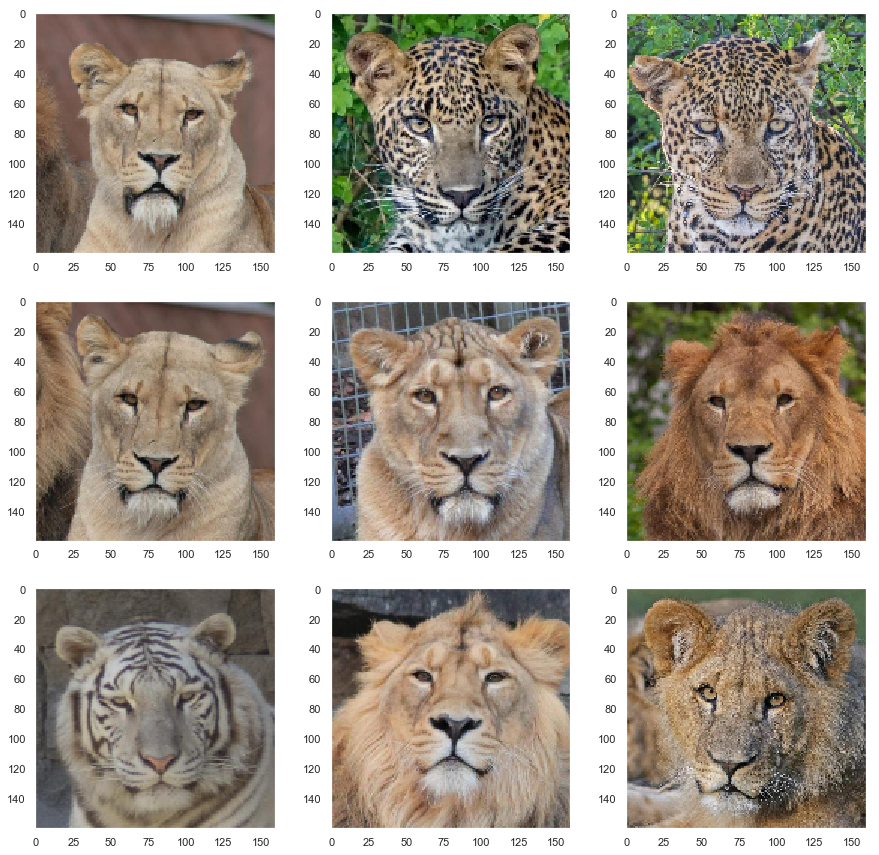

 88


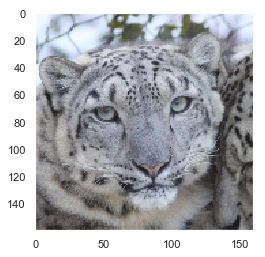

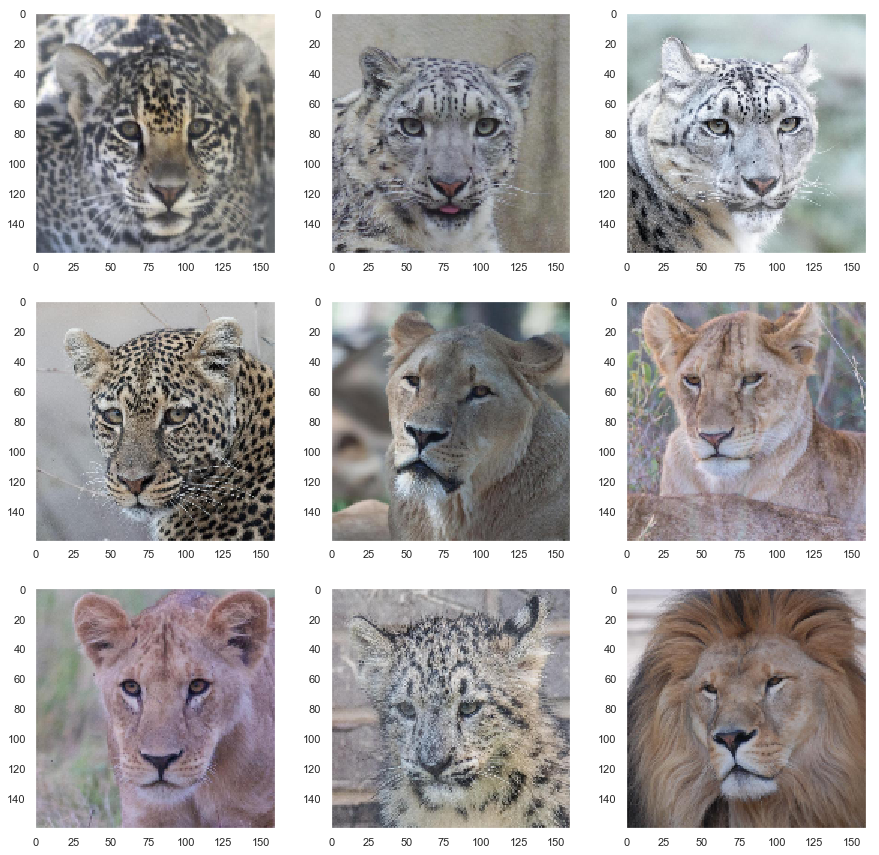

 999


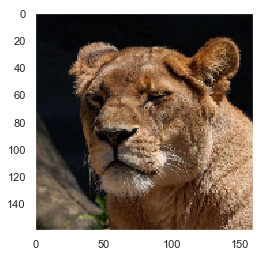

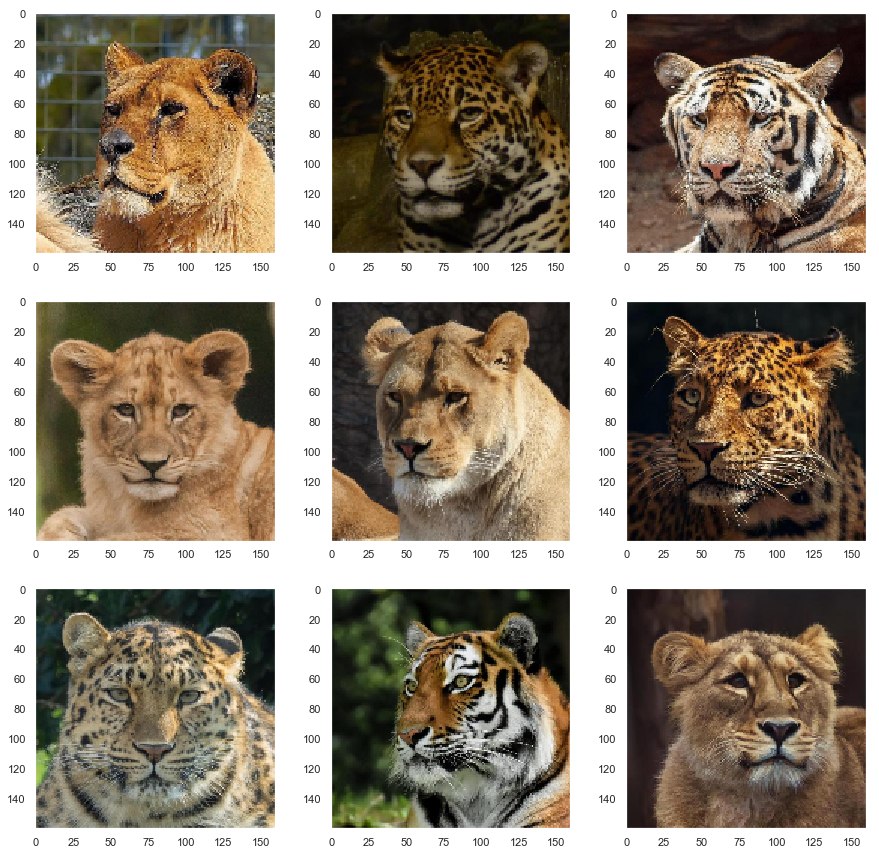

 4444


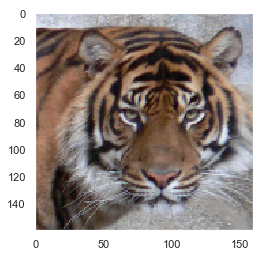

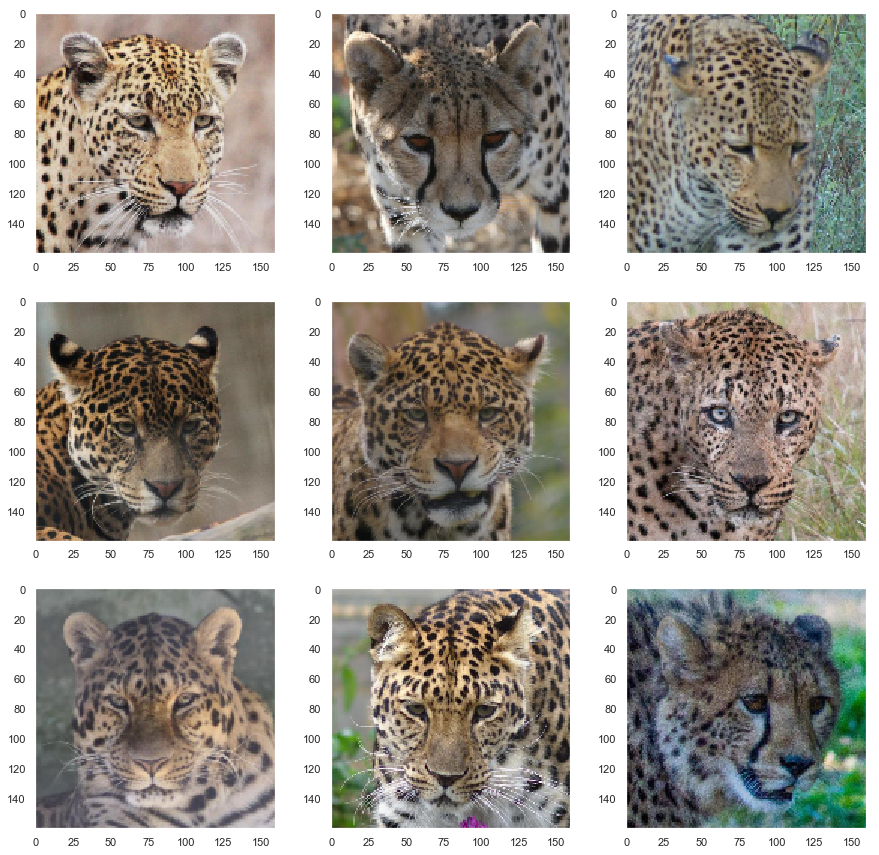

 4112


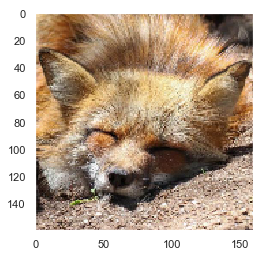

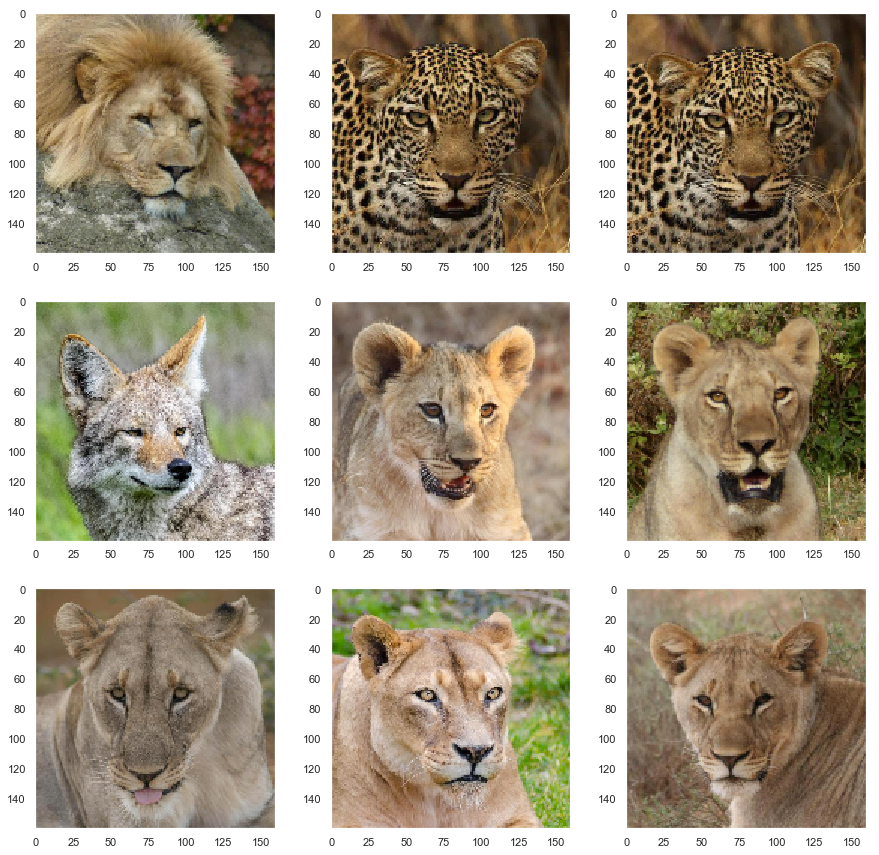

 -1


In [27]:
#n=454
get_matching(encoder_output,img_resized) #now using cosine similarity on the encoded code we will match the nearest images

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

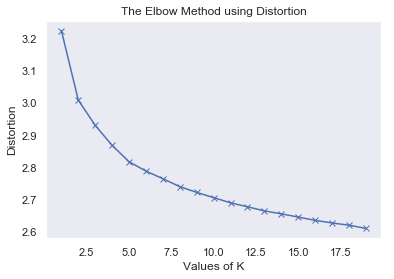

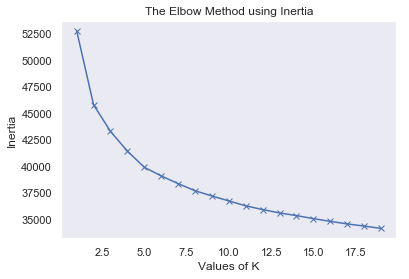

In [21]:
get_number_of_clusters(encoder_output) #Using the elbow method we will set the number of clusters

Do you want to view the clusters?
Enter Yes or No


 Yes


How many items do you want to view per cluster?


 5


---------------Cluster Number  0


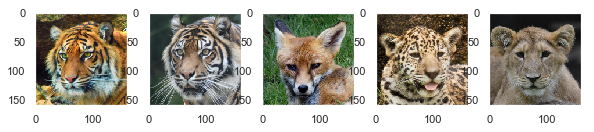

---------------Cluster Number  1


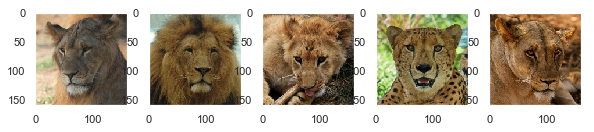

---------------Cluster Number  2


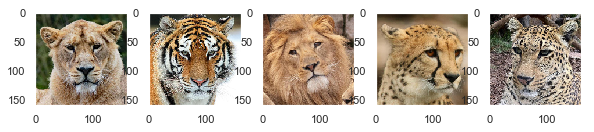

---------------Cluster Number  3


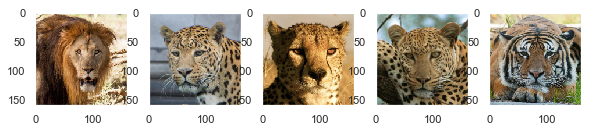

---------------Cluster Number  4


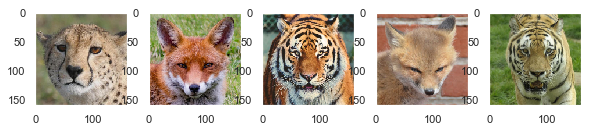

---------------Cluster Number  5


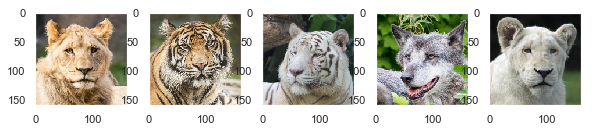

---------------Cluster Number  6


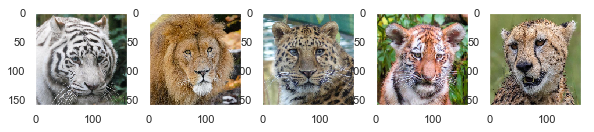

---------------Cluster Number  7


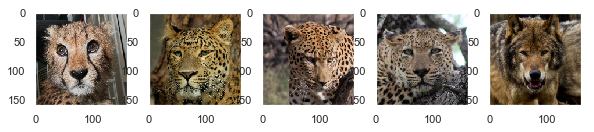

---------------Cluster Number  8


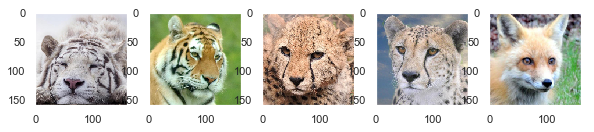

---------------Cluster Number  9


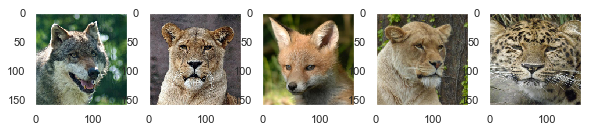

---------------Cluster Number  10


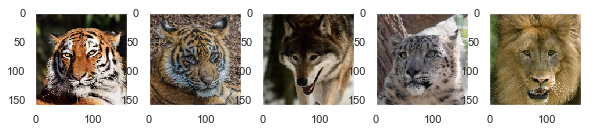

---------------Cluster Number  11


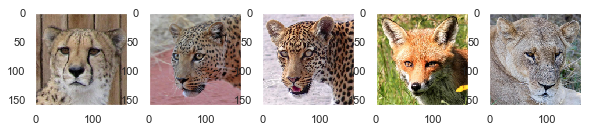

---------------Cluster Number  12


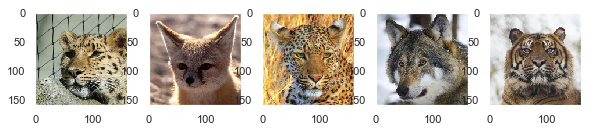

---------------Cluster Number  13


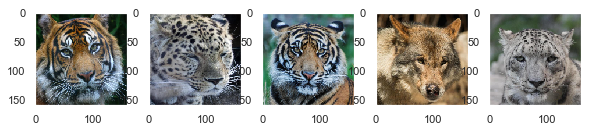

---------------Cluster Number  14


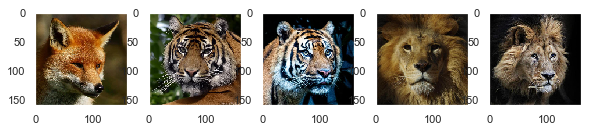

In [22]:
print('Do you want to view the clusters?')
print('Enter Yes or No')
choice=input()
if(choice=='Yes'):
    print('How many items do you want to view per cluster?')
    num=int(input())
    n_clusters=15 #As interpreted from the graph we have set the number of clusters to be 15
    visual_cluster(encoder_output,img_resized,n_clusters,num) 